In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import shap

In [2]:
file_paths = {
    "liability_premium": "table1_Liability_written_premium.csv",
    "collision_data": "table2_CollisonWithPremiums.csv",
    "comprehensive_prem": "table3_ComprehensiveWrittenPrem.csv",
    "avg_expend": "table4_AvgExpend.csv",
    "combined_avg_premium": "table5_Combined_avg_Premium.csv"
}

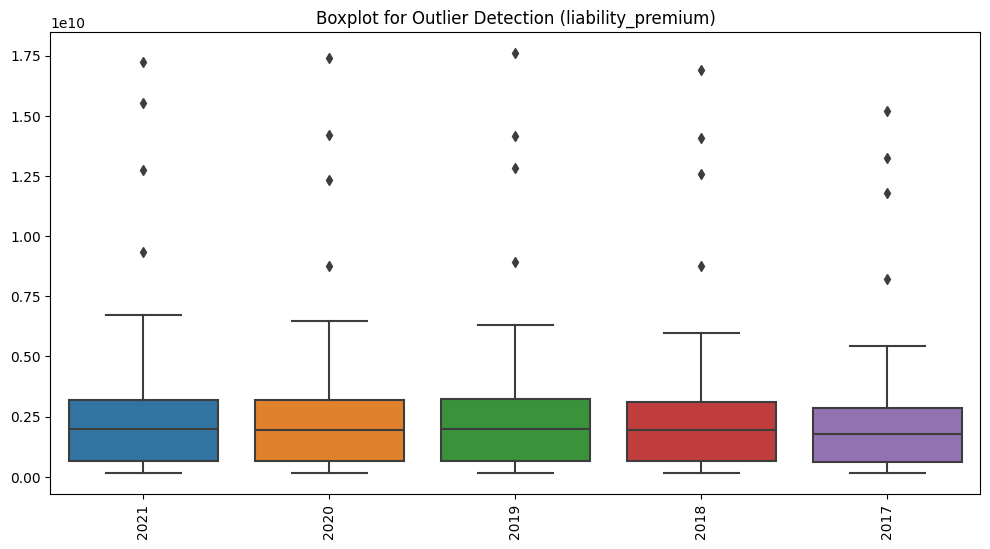

/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')
/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     2.114506e+09
1     2.797708e+08
2     3.432250e+09
3     1.098110e+09
4     1.098110e+09
5     3.091341e+09
6     1.902023e+09
7     6.364496e+08
8     2.094908e+08
9     2.094908e+08
10    6.712546e+09
11    4.219528e+08
12    5.892159e+08
13    3.949094e+09
14    2.206833e+09
15    8.814285e+08
16    9.977297e+08
17    2.014415e+09
18    2.936947e+09
19    3.896951e+08
20    3.145293e+09
21    2.961044e+09
22    4.721283e+09
23    2.054380e+09
2

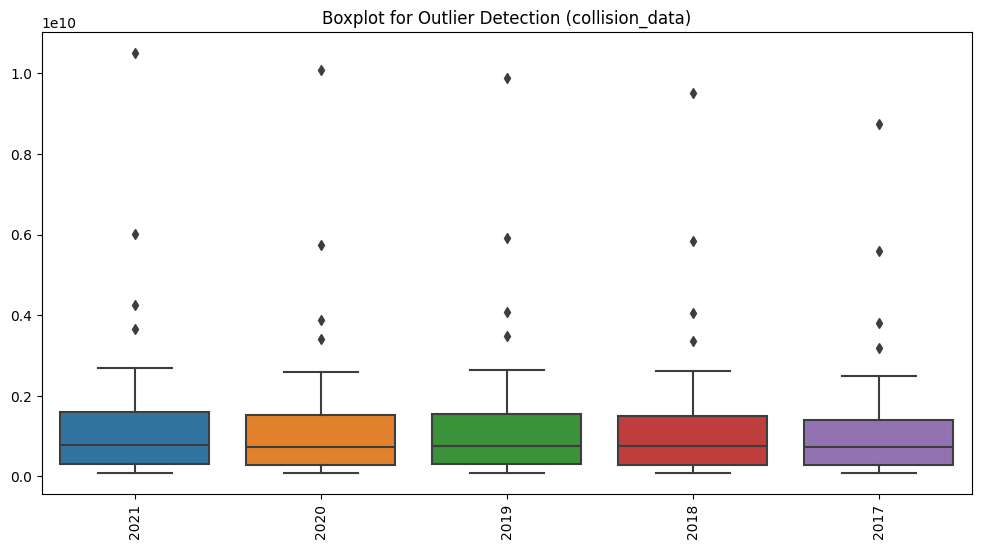

/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')
/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')
/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pa

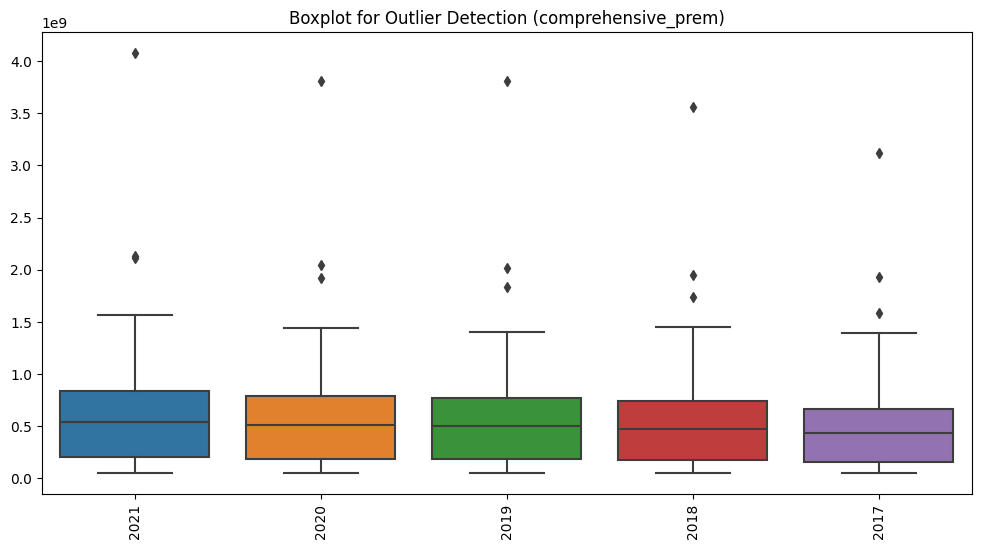

/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')
/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     5.589698e+08
1     6.384683e+07
2     8.950559e+08
3     4.002571e+08
4     2.133299e+09
5     1.122315e+09
6     3.027179e+08
7     8.874534e+07
8     5.127850e+07
9     2.112804e+09
10    1.125060e+09
11    8.210607e+07
12    1.611616e+08
13    1.055729e+09
14    6.051888e+08
15    4.848178e+08
16    4.924564e+08
17    4.315188e+08
18    5.844359e+08
19    1.121909e+08
20    6.261501e+08
21    6.349243e+08
22    9.477397e+08
23    8.146507e+08
2

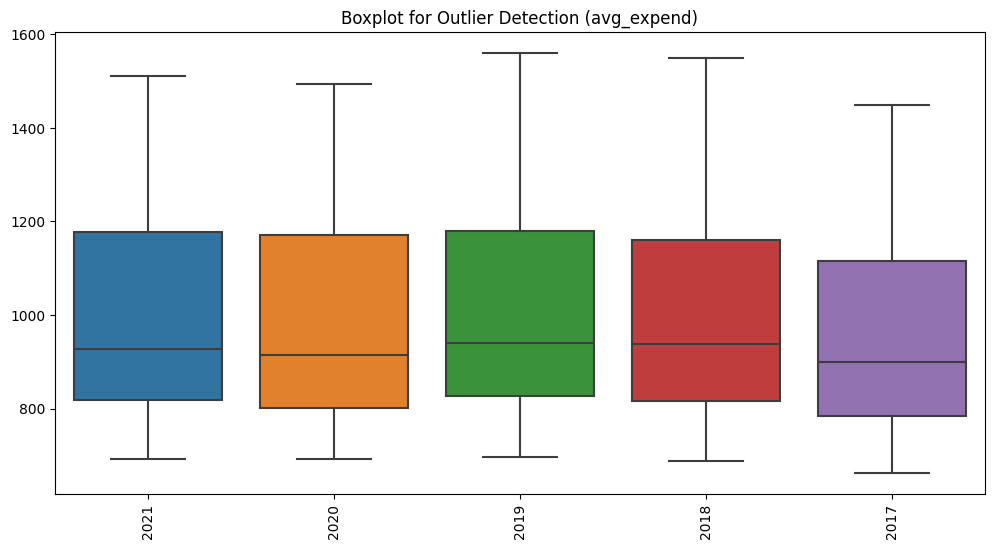

/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')


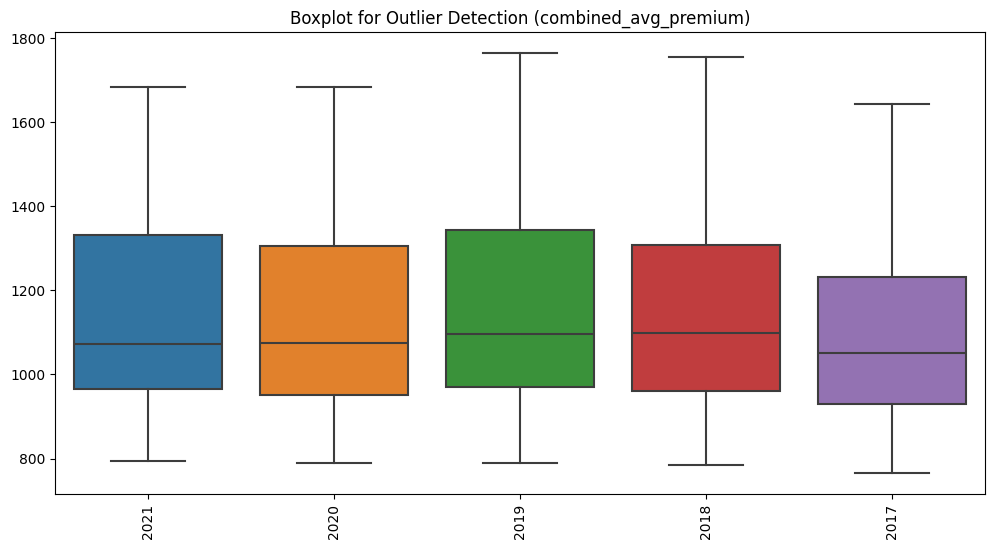

/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')
/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/4027633652.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')


In [3]:
cleaned_data = {}

for table_name, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df_cleaned = df.iloc[:-1]

    df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')
    
    # Visualize outliers using boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_cleaned.iloc[:, 1:])
    plt.title(f"Boxplot for Outlier Detection ({table_name})")
    plt.xticks(rotation=90)
    plt.show()
    
    z_scores = np.abs((df_cleaned.iloc[:, 1:] - df_cleaned.iloc[:, 1:].mean()) / df_cleaned.iloc[:, 1:].std())
    df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].mask(z_scores > 3, np.nan).fillna(method='ffill').fillna(method='bfill')
    
    cleaned_data[table_name] = df_cleaned

In [4]:
print("Summary Statistics")
for table_name, df in cleaned_data.items():
    print(f"{table_name}:")
    print(df.describe().T)


Summary Statistics
liability_premium:
      count          mean           std          min          25%  \
2021   51.0  2.259725e+09  2.369652e+09  161202388.0  641625276.0   
2020   51.0  2.203808e+09  2.289833e+09  160144434.0  631826737.5   
2019   51.0  2.250237e+09  2.367904e+09  161697814.0  642940911.0   
2018   51.0  2.200298e+09  2.318400e+09  159027865.0  624661584.5   
2017   51.0  2.058741e+09  2.171543e+09  155034102.0  584199839.0   

               50%           75%           max  
2021  1.902023e+09  3.104914e+09  1.276524e+10  
2020  1.836629e+09  3.009041e+09  1.231050e+10  
2019  1.796015e+09  3.020679e+09  1.281563e+10  
2018  1.795870e+09  2.954117e+09  1.259195e+10  
2017  1.664529e+09  2.743153e+09  1.180031e+10  
collision_data:
      count          mean           std         min          25%          50%  \
2021   51.0  1.106998e+09  1.152669e+09  92334787.0  310788250.5  681653952.0   
2020   51.0  1.046553e+09  1.087354e+09  88007948.0  294677205.5  655856567

In [5]:
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'District Of Columbia'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [6]:
#df

In [7]:
for name, df in cleaned_data.items():
    df['STATE'] = df['STATE'].replace("lowa", "Iowa")

for name, df in cleaned_data.items():
    df['STATE'] = df['STATE'].str.strip().str.title()  
    df['Region'] = df['STATE'].apply(lambda x: next((region for region, states in regions.items() if x in states), 'Unknown'))
    cleaned_data[name] = df

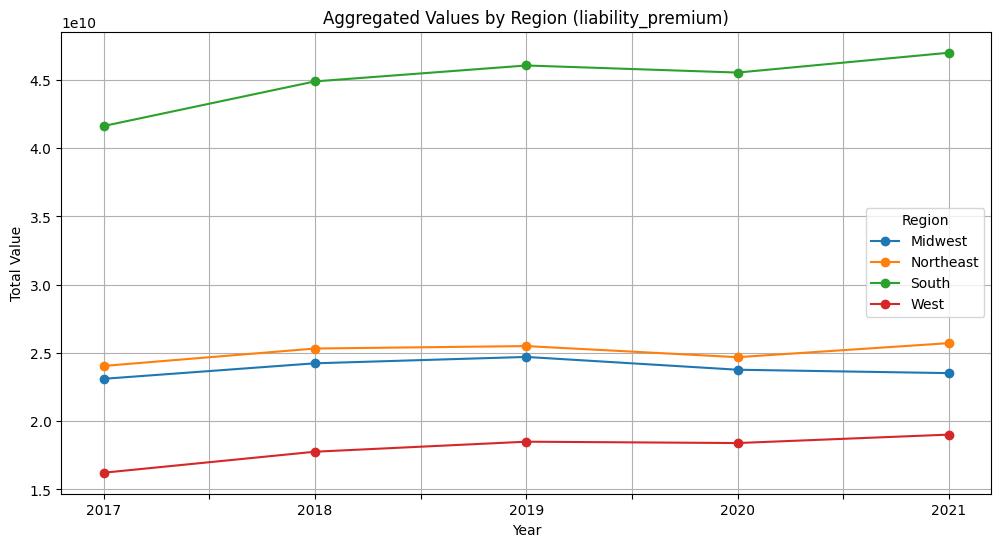

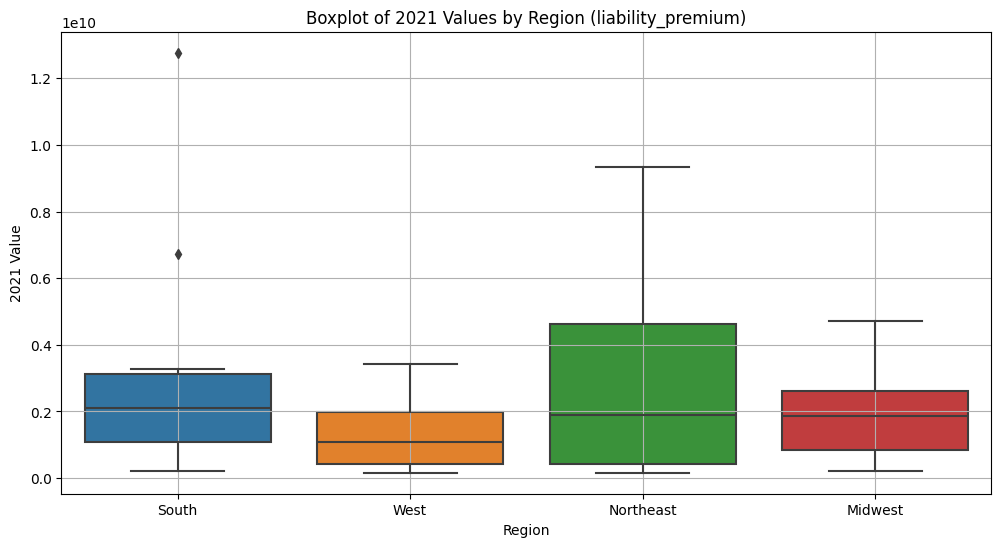

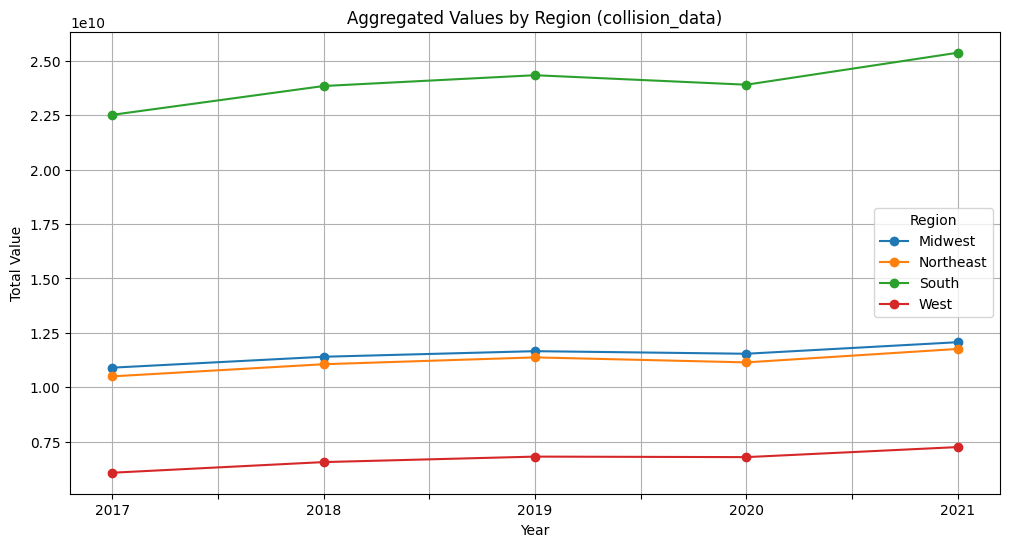

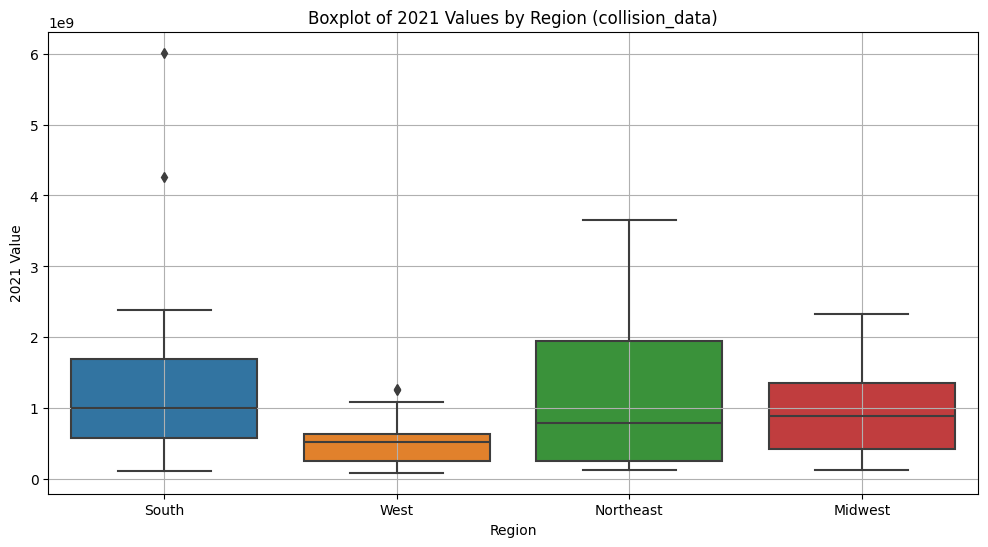

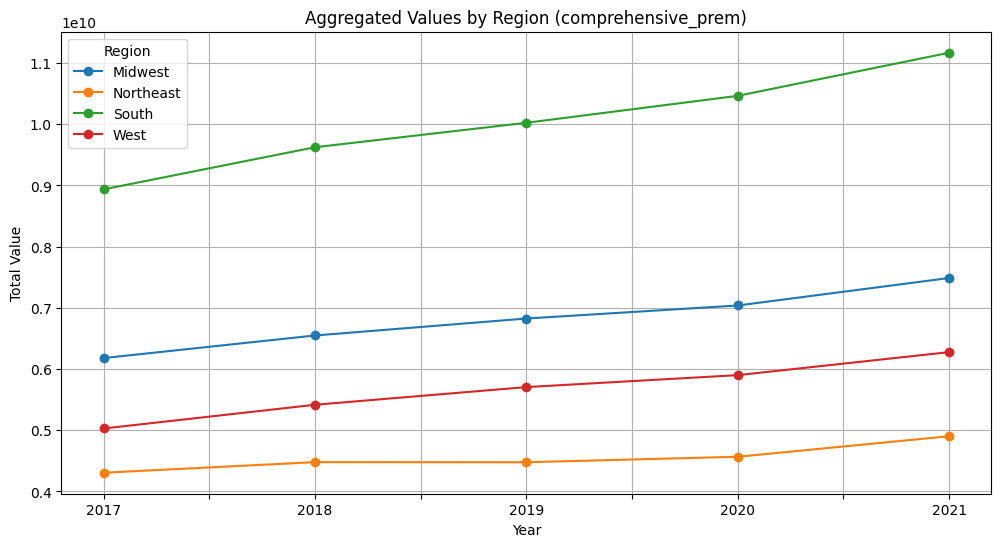

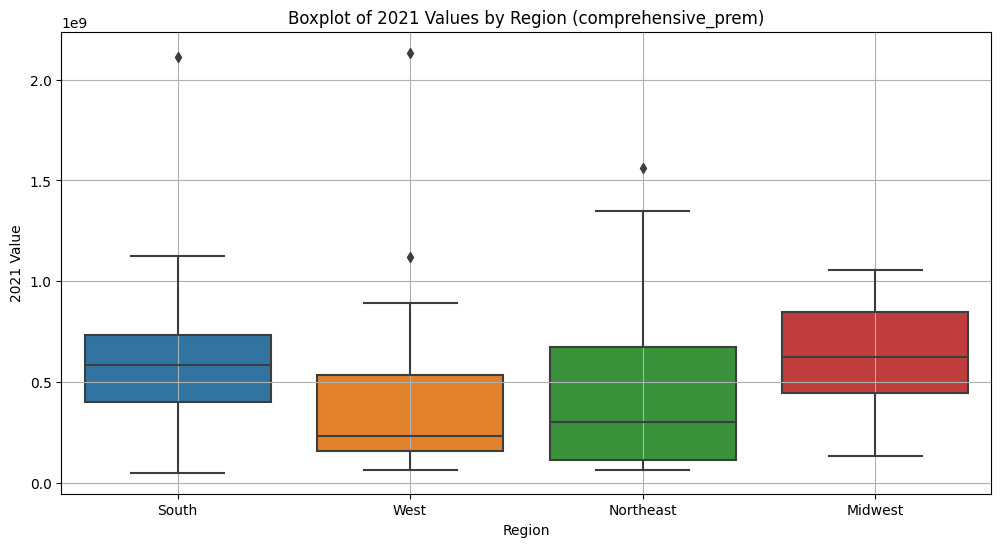

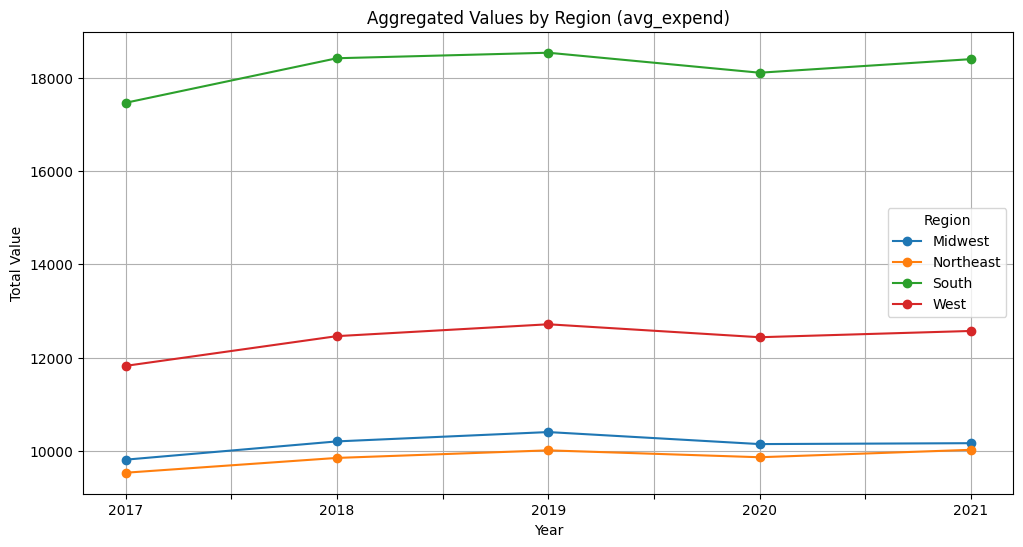

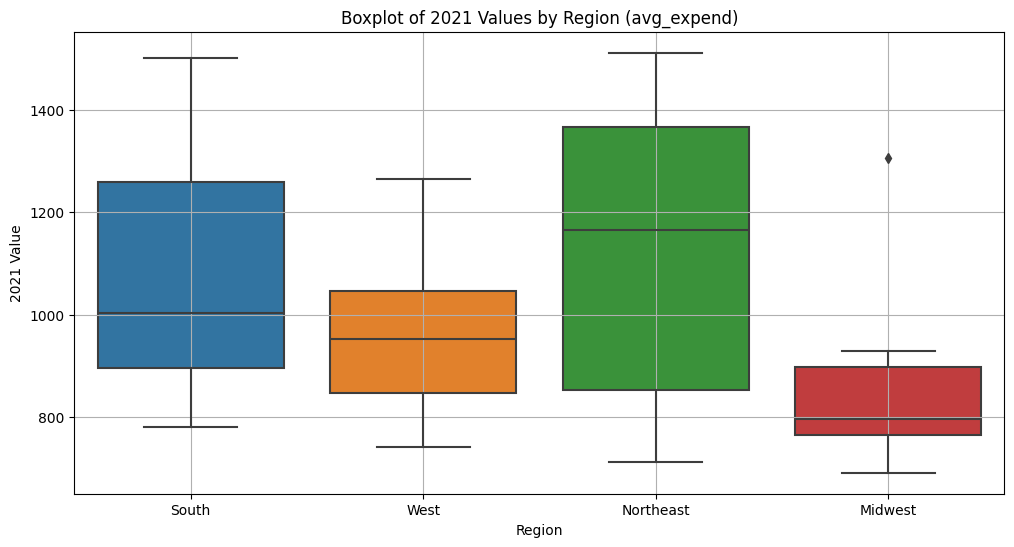

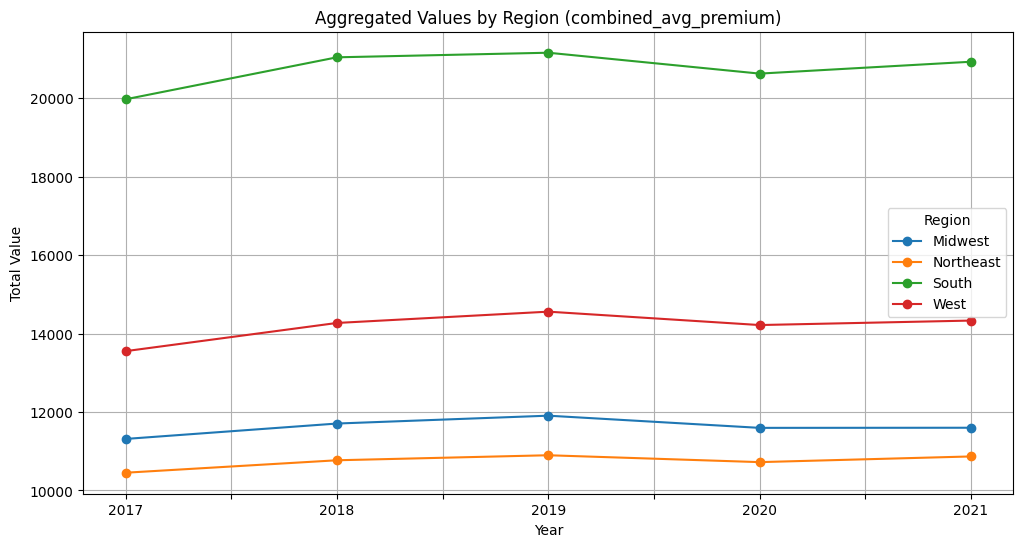

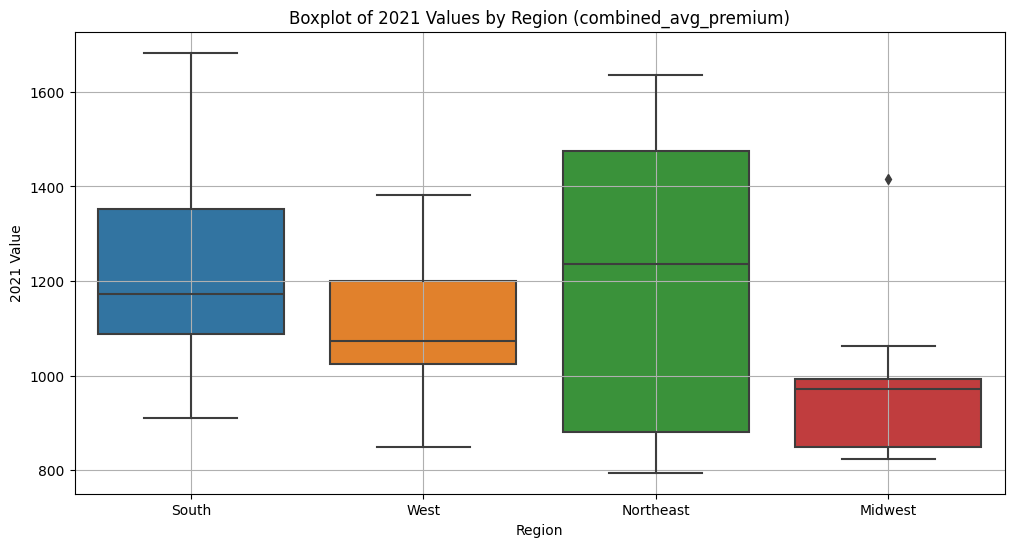

In [8]:
for table_name, df in cleaned_data.items():
    regional_sum = df.groupby('Region').sum()[[str(year) for year in range(2017, 2022)]]
    regional_sum.T.plot(figsize=(12, 6), marker='o')
    plt.title(f"Aggregated Values by Region ({table_name})")
    plt.xlabel("Year")
    plt.ylabel("Total Value")
    plt.legend(title='Region')
    plt.grid(True)
    plt.show()


    # Regional Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y='2021', data=df)
    plt.title(f"Boxplot of 2021 Values by Region ({table_name})")
    plt.xlabel("Region")
    plt.ylabel("2021 Value")
    plt.grid(True)
    plt.show()

In [9]:
for name, df in cleaned_data.items():
    df['Region'] = df['Region'].astype('category').cat.codes
    cleaned_data[name] = df

for name, df in cleaned_data.items():
    years = [str(year) for year in range(2017, 2022)]
    df['GrowthRate'] = df[years].pct_change(axis=1).mean(axis=1)
    df['Volatility'] = df[years].std(axis=1)
    cleaned_data[name] = df

/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/2748344760.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GrowthRate'] = df[years].pct_change(axis=1).mean(axis=1)
/var/folders/nl/5yp3gpm55wbfd66ndpjsm9dm0000gn/T/ipykernel_75156/2748344760.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GrowthRate'] = df[years].pct_change(axis=1).mean(axis=1)


In [23]:
scaler = StandardScaler()
standardized_data = {}

for name, df in cleaned_data.items():
    numeric_data = df.drop(columns=['STATE'])
    standardized_data[name] = pd.DataFrame(
        scaler.fit_transform(numeric_data),
        columns=numeric_data.columns,
        index=df['STATE']
    ).reset_index()

In [24]:
X = standardized_data['combined_avg_premium'].drop(columns=['STATE', '2021'])
y = standardized_data['combined_avg_premium']['2021']

X = X.dropna()
y = y.dropna()

X, y = X.align(y, join='inner', axis=0)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [27]:
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[model_name] = {'Mean R^2': scores.mean(), 'Std Dev': scores.std()}

print("Cross-Validation Results")
for model_name, results in cv_results.items():
    print(f"{model_name}: Mean R^2 = {results['Mean R^2']:.4f}, Std Dev = {results['Std Dev']:.4f}")

Cross-Validation Results
Linear Regression: Mean R^2 = 0.9969, Std Dev = 0.0031
Random Forest: Mean R^2 = 0.9614, Std Dev = 0.0189
Gradient Boosting: Mean R^2 = 0.9556, Std Dev = 0.0232
XGBoost: Mean R^2 = 0.9595, Std Dev = 0.0220


In [30]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("\nFinal Model Evaluation:")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R^2:", r2_score(y_test, y_pred))


Final Model Evaluation:
RMSE: 0.04455223062697025
R^2: 0.997856560711282


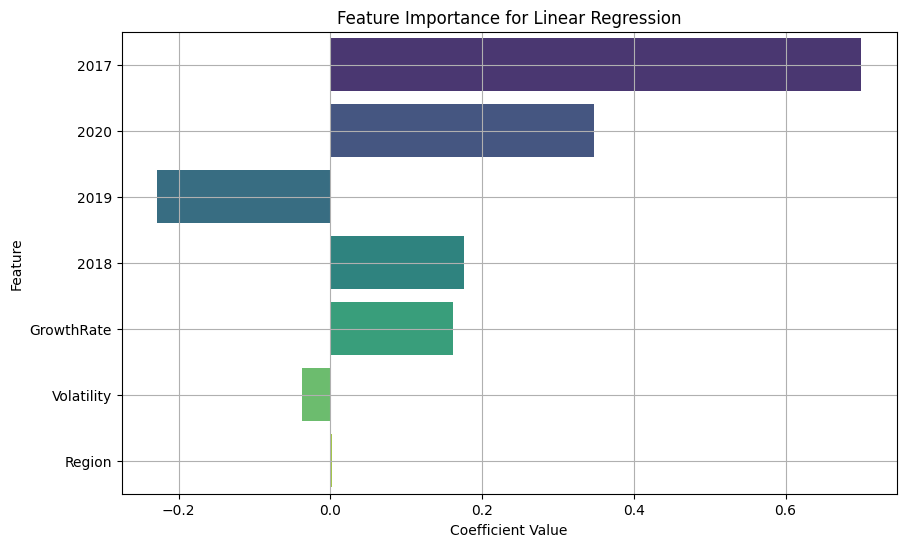

In [29]:
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get feature importance from coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': linear_model.coef_
})

# Sort features by absolute importance
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance for Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()
